1. Read the CSV File
Write the R code to load the "restaurant_business.csv" file into a dataframe named restaurant_data.

2. Handling Missing Values
How can you check for missing values in restaurant_data? Write the R code to display the number of missing values in each column.

Remove rows from restaurant_data where the name of the restaurant is missing. What R function would you use?

3. Performing Imputation
Identify other columns which contain missing values except the Restaurant name. How many missing values are there in the column/s? Write R code to replace the missing values in the column/s with the mean value of all restaurants.

4. Handling Outliers
Write R code to identify outliers in the Sales and YOY_Units columns based on the IQR method. Define outliers as values below the 1st quartile - 1.5 * IQR or above the 3rd quartile + 1.5 * IQR.

Remove the outliers identified in the previous question from restaurant_data. What R code would you use?

5. Export the Cleaned Data
After cleaning the data, write the R code to export the cleaned dataset to a new CSV file named "cleaned_restaurant_data.csv".

6. Summary Statistics (Bonus)
Calculate and display summary statistics (mean, median, max, min) for all the numerical columns in the cleaned dataset. What R function can provide these statistics?

7. Data Visualization (Bonus)
Create a histogram of the Sales column in the cleaned dataset to visualize the distribution of sales. Which R function and package would you use for this plot?


**Question 1**

In [ ]:
restaurant_data <- read.csv(file='restaurant_business.csv')

In [ ]:
summary(restaurant_data)

      Rank         Restaurant            Sales           YOY_Sales        
 Min.   :  1.00   Length:252         Min.   :   126.0   Length:252        
 1st Qu.: 63.75   Class :character   1st Qu.:   181.0   Class :character  
 Median :126.50   Mode  :character   Median :   330.0   Mode  :character  
 Mean   :126.48                      Mean   :  1632.0                     
 3rd Qu.:189.25                      3rd Qu.:   726.5                     
 Max.   :250.00                      Max.   :100456.0                     
                                                                          
     Units          YOY_Units         Segment_Category  
 Min.   :   13.0   Length:252         Length:252        
 1st Qu.:   79.0   Class :character   Class :character  
 Median :  192.5   Mode  :character   Mode  :character  
 Mean   :  852.3                                        
 3rd Qu.:  521.8                                        
 Max.   :23801.0                                        
 

In [ ]:
head(restaurant_data)

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,1,McDonald's,40412,4.90%,13846,-0.50%,Quick Service & Burger
2,2,Starbucks,21380,8.60%,15049,3.00%,Quick Service & Coffee Cafe
3,3,Chick-fil-A,11320,13.00%,2470,5.00%,Quick Service & Chicken
4,4,Taco Bell,11293,9.00%,6766,2.70%,Quick Service & Mexican
5,5,Burger King,10204,2.70%,7346,0.20%,Quick Service & Burger
6,6,Subway,10200,-2.00%,23801,-4.00%,Quick Service & Sandwich


In [ ]:
str(restaurant_data)

'data.frame':	252 obs. of  7 variables:
 $ Rank            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Restaurant      : chr  "McDonald's" "Starbucks" "Chick-fil-A" "Taco Bell" ...
 $ Sales           : int  40412 21380 11320 11293 10204 10200 9762 9228 7044 5890 ...
 $ YOY_Sales       : chr  "4.90%" "8.60%" "13.00%" "9.00%" ...
 $ Units           : int  13846 15049 2470 6766 7346 23801 5852 9630 6126 2160 ...
 $ YOY_Units       : chr  "-0.50%" "3.00%" "5.00%" "2.70%" ...
 $ Segment_Category: chr  "Quick Service & Burger" "Quick Service & Coffee Cafe" "Quick Service & Chicken" "Quick Service & Mexican" ...


**Question 2**

In [ ]:
# Check for missing values in each column
missing_values <- sapply(restaurant_data, function(x) sum(is.na(x)))

# Display the number of missing values in each column
print(missing_values)

            Rank       Restaurant            Sales        YOY_Sales 
               0                8                0                0 
           Units        YOY_Units Segment_Category 
              18               15                0 


In [ ]:
# Remove rows where the name of the restaurant is missing
restaurant_data_clean <- restaurant_data[!is.na(restaurant_data$Restaurant), ]

#or # Remove rows where the name of the restaurant is missing
#restaurant_data_clean <- na.omit(restaurant_data, cols = "Restaurant")



**Question 3**

In [ ]:
# Replace missing values in the 'Units' column with the mean of that column
restaurant_data$Units[is.na(restaurant_data$Units)] <- mean(restaurant_data$Units, na.rm = TRUE)

# Replace missing values in the 'YOY_Units' column with the mean of that column
# First, we need to convert YOY_Units from a percentage string to a numeric value
restaurant_data$YOY_Units <- as.numeric(sub("%", "", restaurant_data$YOY_Units))

# Now we can calculate the mean (excluding NA values) and replace NA values with this mean
restaurant_data$YOY_Units[is.na(restaurant_data$YOY_Units)] <- mean(restaurant_data$YOY_Units, na.rm = TRUE)

# If you want to convert back 'YOY_Units' to a percentage string after the operation, you can do:
restaurant_data$YOY_Units <- paste0(restaurant_data$YOY_Units, "%")


mean function computes the average value of sale

**Question 4**

In [ ]:
# Calculate the IQR for Sales
IQR_Sales <- IQR(restaurant_data$Sales, na.rm = TRUE)
Q1_Sales <- quantile(restaurant_data$Sales, 0.25, na.rm = TRUE)
Q3_Sales <- quantile(restaurant_data$Sales, 0.75, na.rm = TRUE)
lower_bound_Sales <- Q1_Sales - 1.5 * IQR_Sales
upper_bound_Sales <- Q3_Sales + 1.5 * IQR_Sales

# Calculate the IQR for YOY_Units
# Ensure that YOY_Units is a numeric column before computing IQR
restaurant_data$YOY_Units <- as.numeric(sub("%", "", restaurant_data$YOY_Units))
IQR_YOY_Units <- IQR(restaurant_data$YOY_Units, na.rm = TRUE)
Q1_YOY_Units <- quantile(restaurant_data$YOY_Units, 0.25, na.rm = TRUE)
Q3_YOY_Units <- quantile(restaurant_data$YOY_Units, 0.75, na.rm = TRUE)
lower_bound_YOY_Units <- Q1_YOY_Units - 1.5 * IQR_YOY_Units
upper_bound_YOY_Units <- Q3_YOY_Units + 1.5 * IQR_YOY_Units

# Identify outliers in the Sales and YOY_Units columns
outliers_Sales <- (restaurant_data$Sales < lower_bound_Sales) | (restaurant_data$Sales > upper_bound_Sales)
outliers_YOY_Units <- (restaurant_data$YOY_Units < lower_bound_YOY_Units) | (restaurant_data$YOY_Units > upper_bound_YOY_Units)

# Combine outliers for both columns
outliers <- outliers_Sales | outliers_YOY_Units

# Remove rows that contain outliers in either Sales or YOY_Units columns
restaurant_data_clean <- restaurant_data[!outliers, ]


**Question 5**

In [ ]:
# Write the cleaned dataframe to a new CSV file
write.csv(restaurant_data_clean, "cleaned_restaurant_data.csv", row.names = FALSE)


**Question 6**

In [ ]:
# Calculate and display summary statistics for the cleaned dataset
summary_stats <- sapply(restaurant_data_clean, function(x) {
  if (is.numeric(x)) {
    c(Mean = mean(x, na.rm = TRUE),
      Median = median(x, na.rm = TRUE),
      Max = max(x, na.rm = TRUE),
      Min = min(x, na.rm = TRUE))
  }
})

# Display the summary statistics
print(summary_stats)


$Rank
   Mean  Median     Max     Min 
144.711 146.000 249.000  43.000 

$Restaurant
NULL

$Sales
     Mean    Median       Max       Min 
 369.4971  266.0000 1423.0000  126.0000 

$YOY_Sales
NULL

$Units
     Mean    Median       Max       Min 
 310.7219  187.0000 2524.0000   13.0000 

$YOY_Units
      Mean     Median        Max        Min 
 0.4335333  0.0000000 10.5000000 -9.0000000 

$Segment_Category
NULL



**Question 7**

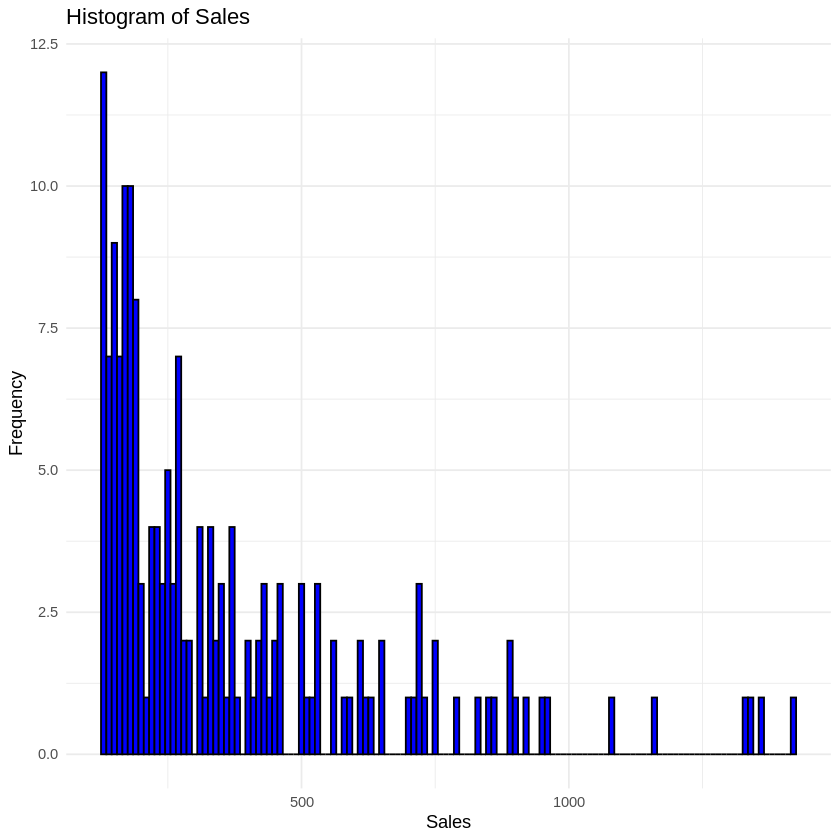

In [ ]:
# Load the ggplot2 package
library(ggplot2)

# Create a histogram of the Sales column
ggplot(restaurant_data_clean, aes(x = Sales)) +
  geom_histogram(binwidth = 10, fill = "blue", color = "black") +
  theme_minimal() +
  labs(title = "Histogram of Sales",
       x = "Sales",
       y = "Frequency")
